In [163]:
import pandas as pd
df = pd.read_csv("data/application_record.csv")


In [103]:
import pandas as pd

mode_value = df['OCCUPATION_TYPE'].mode()[0]

# Replace missing values with the mode
df['OCCUPATION_TYPE'].fillna(mode_value, inplace=True)

# Verify that missing values have been filled
print(df['OCCUPATION_TYPE'].isnull().sum())  # Should print 0 if all missing values are replaced


0


In [165]:
import numpy as np

def aggregate_columns(column):
    if column.dtype == 'O':  # If categorical
        # Check if the mode exists
        mode = column.mode()
        if not mode.empty:
            return mode.iloc[0]  # Most frequent value
        else:
            return None  # Return None if no mode is found
    else:  # For numerical columns
        return column.mean()  # Use mean

df = df.groupby('ID').agg(aggregate_columns).reset_index()
print(df)

             ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0       5008804           M            Y               Y           0.0   
1       5008805           M            Y               Y           0.0   
2       5008806           M            Y               Y           0.0   
3       5008808           F            N               Y           0.0   
4       5008809           F            N               Y           0.0   
...         ...         ...          ...             ...           ...   
438505  7999660           F            N               N           0.0   
438506  7999696           F            N               Y           2.0   
438507  7999738           M            N               Y           0.0   
438508  7999784           F            Y               Y           1.0   
438509  7999952           F            N               Y           1.0   

        AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0               427500.0      

In [167]:
df.isnull().sum()


ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134179
CNT_FAM_MEMBERS             0
dtype: int64

In [169]:
df.drop(columns=['FLAG_MOBIL'], inplace=True)

print(df.columns)  # 'FLAG_MOBIL' should no longer appear in the list of columns

KeyError: "['FLAG_MOBIL'] not found in axis"

In [171]:
# Convert negative values in 'DAYS_BIRTH' and 'DAYS_EMPLOYED' to positive values
df['DAYS_BIRTH'] = abs(df['DAYS_BIRTH'])
df['DAYS_EMPLOYED'] = abs(df['DAYS_EMPLOYED'])

# Optionally, if you want to convert days to years (for 'DAYS_BIRTH'):
df['AGE'] = df['DAYS_BIRTH'] / 365  # Convert days to years

# Optionally, if you want to convert 'DAYS_EMPLOYED' to years:
df['EMPLOYMENT_YEARS'] = df['DAYS_EMPLOYED'] / 365  # Convert days to years

# Verify changes
print(df[['DAYS_BIRTH', 'AGE', 'DAYS_EMPLOYED', 'EMPLOYMENT_YEARS']].tail())


        DAYS_BIRTH        AGE  DAYS_EMPLOYED  EMPLOYMENT_YEARS
438505     13432.0  36.800000         5446.0         14.920548
438506     12576.0  34.454795         4382.0         12.005479
438507      9970.0  27.315068          119.0          0.326027
438508     10630.0  29.123288          454.0          1.243836
438509     15859.0  43.449315         3679.0         10.079452


In [173]:
# Handling extreme negative values (optional)
df.loc[df['DAYS_EMPLOYED'] < -10000, 'DAYS_EMPLOYED'] = None  # Mark extreme negative values as missing (e.g., > 10 years)


In [175]:
import numpy as np

# Assuming df is your DataFrame
# Ensure that the 'DAYS_BIRTH' and 'DAYS_EMPLOYED' columns are already in the correct format (days)

# Convert 'DAYS_BIRTH' to age in years
df['AGE'] = abs(df['DAYS_BIRTH']) / 365

# Convert 'DAYS_EMPLOYED' to employment years
df['EMPLOYMENT_YEARS'] = abs(df['DAYS_EMPLOYED']) / 365

# Handle the case where employment years are greater than the person's age minus 18
df.loc[df['EMPLOYMENT_YEARS'] > (df['AGE'] - 18), 'EMPLOYMENT_YEARS'] = np.nan  # Replace with NaN if unrealistic

# Handle extreme employment years (e.g., more than 100 years of employment)
df.loc[df['EMPLOYMENT_YEARS'] > 100, 'EMPLOYMENT_YEARS'] = np.nan  # Replace with NaN for extreme values

# Verify the changes
print(df[['DAYS_BIRTH', 'AGE', 'DAYS_EMPLOYED', 'EMPLOYMENT_YEARS']].tail())


        DAYS_BIRTH        AGE  DAYS_EMPLOYED  EMPLOYMENT_YEARS
438505     13432.0  36.800000         5446.0         14.920548
438506     12576.0  34.454795         4382.0         12.005479
438507      9970.0  27.315068          119.0          0.326027
438508     10630.0  29.123288          454.0          1.243836
438509     15859.0  43.449315         3679.0         10.079452


In [176]:
from sklearn.preprocessing import MinMaxScaler

# Assuming df is your DataFrame and 'AMT_INCOME_TOTAL' is the column to normalize

scaler = MinMaxScaler()

# Normalize the 'AMT_INCOME_TOTAL' column
df['AMT_INCOME_TOTAL'] = scaler.fit_transform(df[['AMT_INCOME_TOTAL']])

# Verify the result
print(df[['AMT_INCOME_TOTAL']].tail())


        AMT_INCOME_TOTAL
438505          0.009503
438506          0.016196
438507          0.022889
438508          0.022889
438509          0.019542


In [177]:
# Check distribution of CODE_GENDER
print(df['CODE_GENDER'].value_counts())

# Check distribution of NAME_INCOME_TYPE
print(df['NAME_INCOME_TYPE'].value_counts())


CODE_GENDER
F    294422
M    144088
Name: count, dtype: int64
NAME_INCOME_TYPE
Working                 226072
Commercial associate    100753
Pensioner                75483
State servant            36185
Student                     17
Name: count, dtype: int64


In [178]:
# Check for missing values
print(df.isnull().sum())


ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134179
CNT_FAM_MEMBERS             0
AGE                         0
EMPLOYMENT_YEARS        75574
dtype: int64


In [179]:
# Check data types of each column
print(df.dtypes)


ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN           float64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH             float64
DAYS_EMPLOYED          float64
FLAG_WORK_PHONE        float64
FLAG_PHONE             float64
FLAG_EMAIL             float64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
AGE                    float64
EMPLOYMENT_YEARS       float64
dtype: object


In [180]:
# Get descriptive statistics for the 'EMPLOYMENT_YEARS' column
print(df['EMPLOYMENT_YEARS'].describe()) #DATA IS RIGHT SKEWED USE MEDIAN


count    362936.000000
mean          7.179731
std           6.568024
min           0.032877
25%           2.504110
50%           5.268493
75%           9.613699
max          48.030137
Name: EMPLOYMENT_YEARS, dtype: float64


In [181]:
df['EMPLOYMENT_YEARS'] = df['EMPLOYMENT_YEARS'].fillna(df['EMPLOYMENT_YEARS'].median())

In [182]:
# Check for missing values
print(df.isnull().sum())


ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134179
CNT_FAM_MEMBERS             0
AGE                         0
EMPLOYMENT_YEARS            0
dtype: int64


In [183]:
# Check for outliers or invalid values
print(df.describe())


                 ID   CNT_CHILDREN  AMT_INCOME_TOTAL     DAYS_BIRTH  \
count  4.385100e+05  438510.000000     438510.000000  438510.000000   
mean   6.022035e+06       0.427387          0.024007   15997.919490   
std    5.714962e+05       0.724863          0.016372    4184.914798   
min    5.008804e+06       0.000000          0.000000    7489.000000   
25%    5.609362e+06       0.000000          0.014188   12514.000000   
50%    6.047720e+06       0.000000          0.020078   15630.000000   
75%    6.454161e+06       1.000000          0.029581   19483.000000   
max    7.999952e+06      19.000000          1.000000   25201.000000   

       DAYS_EMPLOYED  FLAG_WORK_PHONE     FLAG_PHONE     FLAG_EMAIL  \
count  438510.000000    438510.000000  438510.000000  438510.000000   
mean    64909.149696         0.206131       0.287767       0.108202   
std    136785.546110         0.404514       0.452709       0.310625   
min        12.000000         0.000000       0.000000       0.000000   
25%  

In [184]:
# Check the range of numeric features
print(df[['AGE', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH']].min())
print(df[['AGE', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH']].max())


AGE                   20.517808
AMT_INCOME_TOTAL       0.000000
DAYS_BIRTH          7489.000000
dtype: float64
AGE                    69.043836
AMT_INCOME_TOTAL        1.000000
DAYS_BIRTH          25201.000000
dtype: float64


In [185]:
# Check if new features are correctly created (e.g., 'AGE' or 'EMPLOYMENT_YEARS')
print(df[['AGE', 'EMPLOYMENT_YEARS']].head())


         AGE  EMPLOYMENT_YEARS
0  32.890411         12.443836
1  32.890411         12.443836
2  58.832877          3.106849
3  52.356164          8.358904
4  52.356164          8.358904


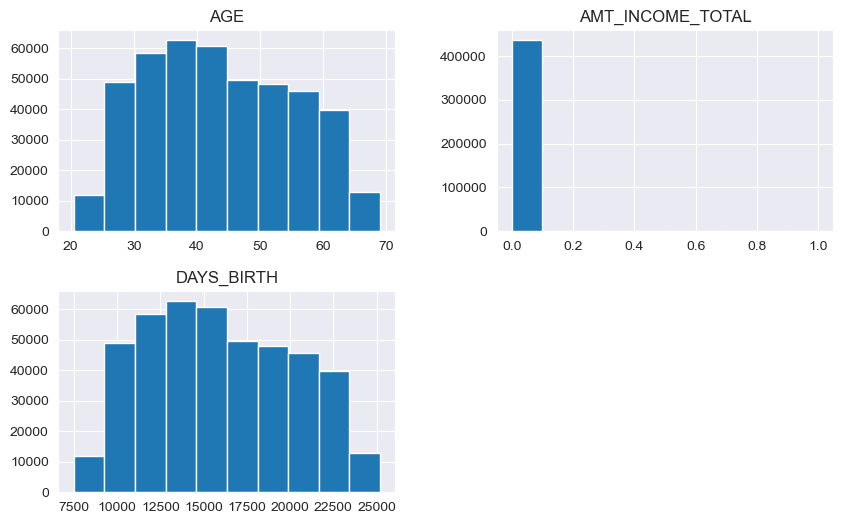

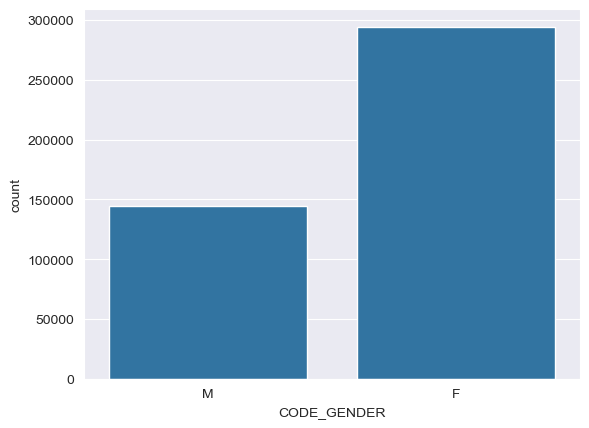

In [186]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numeric columns
df[['AGE', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH']].hist(figsize=(10, 6))
plt.show()

# Bar plots for categorical columns
sns.countplot(x='CODE_GENDER', data=df)
plt.show()


In [187]:
# Filter rows where AMT_INCOME_TOTAL is 0 or negative
invalid_income = df[df['AMT_INCOME_TOTAL'] <= 0]

# Display the invalid rows to inspect them
print(invalid_income)


             ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
238132  6093712           F            N               N           0.0   
238133  6093713           F            N               N           0.0   

        AMT_INCOME_TOTAL NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
238132               0.0        Pensioner  Secondary / secondary special   
238133               0.0        Pensioner  Secondary / secondary special   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
238132            Married  House / apartment     21003.0       365243.0   
238133            Married  House / apartment     21003.0       365243.0   

        FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
238132              0.0         0.0         0.0            None   
238133              0.0         0.0         0.0            None   

        CNT_FAM_MEMBERS        AGE  EMPLOYMENT_YEARS  
238132              2.0  57.542466          5.268493  
238133    

In [188]:
# Drop rows where AMT_INCOME_TOTAL is 0
df = df[df['AMT_INCOME_TOTAL'] != 0]

# Check the number of rows remaining
print(f"Number of rows after dropping zero income: {df.shape[0]}")


Number of rows after dropping zero income: 438508


In [189]:
# Filter rows where AMT_INCOME_TOTAL is 0 or negative
invalid_income = df[df['AMT_INCOME_TOTAL'] <= 0]

# Display the invalid rows to inspect them
print(invalid_income)

Empty DataFrame
Columns: [ID, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, DAYS_BIRTH, DAYS_EMPLOYED, FLAG_WORK_PHONE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, AGE, EMPLOYMENT_YEARS]
Index: []


In [190]:
# Display the first few rows of the cleaned dataset
print(df.head())


        ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y           0.0   
1  5008805           M            Y               Y           0.0   
2  5008806           M            Y               Y           0.0   
3  5008808           F            N               Y           0.0   
4  5008809           F            N               Y           0.0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          0.059697               Working               Higher education   
1          0.059697               Working               Higher education   
2          0.012850               Working  Secondary / secondary special   
3          0.036274  Commercial associate  Secondary / secondary special   
4          0.036274  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civil marriage   Rented apartment     12005.0 

In [191]:
# Check for missing values in the entire dataset
missing_values = df.isnull().sum()
print(f"Missing values per column:\n{missing_values}")

# If you want to check for missing values in a specific column
print(df['AMT_INCOME_TOTAL'].isnull().sum())  # Example for one column


Missing values per column:
ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134177
CNT_FAM_MEMBERS             0
AGE                         0
EMPLOYMENT_YEARS            0
dtype: int64
0


In [192]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Optionally, remove duplicates
df = df.drop_duplicates()


Number of duplicate rows: 0


In [193]:
# Check for negative or unrealistic values in 'DAYS_BIRTH' (age)
print(f"Negative age values: {df[df['DAYS_BIRTH'] < 0].shape[0]}")

# Check for extreme or unrealistic values in 'DAYS_EMPLOYED'
print(f"Extreme 'DAYS_EMPLOYED' values: {df[df['DAYS_EMPLOYED'] > 365243].shape[0]}")  # 1000+ years


Negative age values: 0
Extreme 'DAYS_EMPLOYED' values: 0


In [194]:
# Check for zero income values
zero_income = df[df['AMT_INCOME_TOTAL'] == 0]
print(f"Rows with zero income: {zero_income.shape[0]}")


Rows with zero income: 0


In [195]:
# Check for outliers in 'AMT_INCOME_TOTAL' (for example, values beyond 99th percentile)
income_percentile_99 = df['AMT_INCOME_TOTAL'].quantile(0.99)
outliers_income = df[df['AMT_INCOME_TOTAL'] > income_percentile_99]
print(f"Rows with income above the 99th percentile: {outliers_income.shape[0]}")


Rows with income above the 99th percentile: 3658


In [196]:
# Check if AGE is within a reasonable range (e.g., between 18 and 100)
print(df[(df['AGE'] < 18) | (df['AGE'] > 100)])

# Check for valid employment years (should be > 0)
print(df[df['EMPLOYMENT_YEARS'] <= 0])


Empty DataFrame
Columns: [ID, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, DAYS_BIRTH, DAYS_EMPLOYED, FLAG_WORK_PHONE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, AGE, EMPLOYMENT_YEARS]
Index: []
Empty DataFrame
Columns: [ID, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, DAYS_BIRTH, DAYS_EMPLOYED, FLAG_WORK_PHONE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, AGE, EMPLOYMENT_YEARS]
Index: []


In [197]:
import pandas as pd

# Assuming `df` is your DataFrame that you want to save and make available

# Save the DataFrame to a CSV file
df.to_csv('application_record_cleaned.csv', index=False)

# If you are running in a web-based or GUI framework, implement download functionality accordingly.
print("File has been saved as 'application_record_cleaned.csv'. You can provide this file for download if needed.")

File has been saved as 'application_record_cleaned.csv'. You can provide this file for download if needed.


In [198]:
print(df.columns)

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'AGE', 'EMPLOYMENT_YEARS'],
      dtype='object')
